In [1]:
import os
os.environ["HOME"]

'/home/kyungha'

In [2]:
import tensorflow as tf
print(tf.__version__)
AUTOTUNE = tf.data.experimental.AUTOTUNE

2.3.1


In [3]:
import numpy as np
def one_hot_encoder(s):
    pep_num = ' '.join([str(ints) for ints in range(20)])
    pep_ref = 'A C D E F G H I K L M N P Q R S T V W Y'
    d = dict(zip(pep_ref.split(' '), pep_num.split(' ')))
    
    x = np.zeros((len(d), len(s)))
    x[[int(d[c]) for c in s], range(len(s))] = 1
    return x

In [4]:
import pandas as pd
folder = '/path_for_peptide_sequences/pepide_sequences_with_class_file'
well_4000 = pd.read_csv('{}/Transwell_4000_total.csv'.format(folder), sep = ",")
chip_4000 = pd.read_csv('{}/Chip2um_4000_total.csv'.format(folder), sep = ",")
invivo_4000 = pd.read_csv('{}/Invivo_4000_total.csv'.format(folder), sep = ",")

In [5]:
well_4000.head()

,#pseq,Class,Input1_1,Input1_2,Input1_3,Well_1,Well_2,Well_3
0,SDHGITVDVGWW,1,0.00,0.00,0.00,0.0,0.0,0.28
1,YADLSDHWARRP,0,2.05,0.00,3.62,0.0,0.0,0.00
2,KITEYSFGIHEP,0,2.87,0.71,3.14,0.0,0.0,0.00
3,SPSSWSTADAEK,0,0.00,0.71,3.62,0.0,0.0,0.00
4,ISMPEPVRRLAR,1,0.00,0.00,0.00,0.0,0.0,0.28


In [6]:
#Train : validation = 8 : 2 from 3,200 sequences
#Random selection
m_train = invivo_4000.sample(frac=0.8)
m_test = invivo_4000.loc[(~invivo_4000['#pseq'].isin(m_train['#pseq'])), :]

In [7]:
#Sequences to One-hot encoding vector for CNN
pep_seq = m_train['#pseq'].tolist()
pep_class = m_train['Class'].tolist()
X_seq = [one_hot_encoder(x) for x in pep_seq]
X_seq = np.transpose(np.asarray(X_seq), (0, 2, 1))
X_seq = X_seq.astype('float32')
Y_class = np.array(pep_class)

In [8]:
print('Length of data:', X_seq.shape[0])
print('Length of peptides:', X_seq.shape[1])
print('Length of amino acids:', X_seq.shape[2])

Length of data: 3200
Length of peptides: 12
Length of amino acids: 20


In [9]:
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import models 

In [10]:
#Model path
import os
model_path = os.getcwd()
model_path = os.path.join(model_path,'models')
os.makedirs(model_path, exist_ok = True)
print(model_path)

/home/kyungha/Downloads/BBB_phage_display/models


In [11]:
#Hyperparameter : manually

BATCH_SIZE = 16
PEP_length = 12
AA_type  = 20
CLASS_NAMES = ['enriched','not-enriched']
params = [['CONV', 400, 3, 1],
          ['DROP', 0.7],
          ['POOL', 2, 1],
          ['FLAT'],
          ['DENSE', 50]]
activation_func = 'relu'
regularizer_params = None

In [12]:
model_version = 1
dict_history = {}
#steps_per_epoch = 160 (160(steps per epoch) * 16(batch size) =2560(training data set number))
steps_per_epoch = 160
Epochs = 50

Epoch 1/50
160/160 - 1s - loss: 0.6870 - acc: 0.5465 - val_loss: 0.6713 - val_acc: 0.6750
Epoch 2/50
160/160 - 0s - loss: 0.6542 - acc: 0.6477 - val_loss: 0.6359 - val_acc: 0.7156
Epoch 3/50
160/160 - 0s - loss: 0.6106 - acc: 0.6980 - val_loss: 0.6059 - val_acc: 0.7281
Epoch 4/50
160/160 - 0s - loss: 0.5807 - acc: 0.7145 - val_loss: 0.5826 - val_acc: 0.7266
Epoch 5/50
160/160 - 0s - loss: 0.5624 - acc: 0.7242 - val_loss: 0.5654 - val_acc: 0.7469
Epoch 6/50
160/160 - 0s - loss: 0.5367 - acc: 0.7441 - val_loss: 0.5537 - val_acc: 0.7375
Epoch 7/50
160/160 - 1s - loss: 0.5267 - acc: 0.7418 - val_loss: 0.5434 - val_acc: 0.7516
Epoch 8/50
160/160 - 1s - loss: 0.5092 - acc: 0.7504 - val_loss: 0.5371 - val_acc: 0.7672
Epoch 9/50
160/160 - 0s - loss: 0.5080 - acc: 0.7535 - val_loss: 0.5291 - val_acc: 0.7469
Epoch 10/50
160/160 - 0s - loss: 0.4968 - acc: 0.7613 - val_loss: 0.5217 - val_acc: 0.7563
Epoch 11/50
160/160 - 0s - loss: 0.4852 - acc: 0.7691 - val_loss: 0.5189 - val_acc: 0.7437
Epoch 12

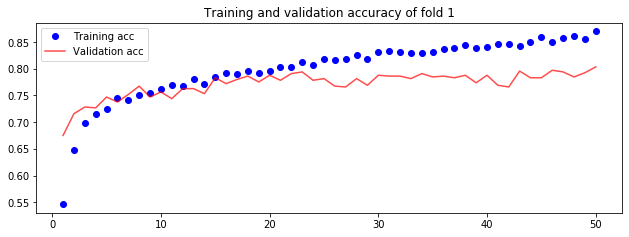

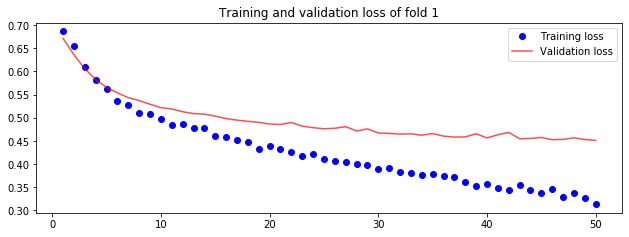

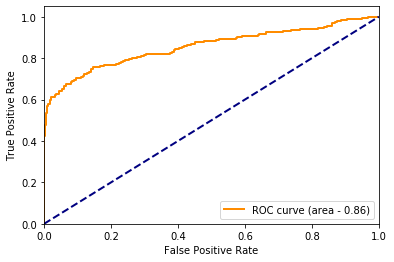

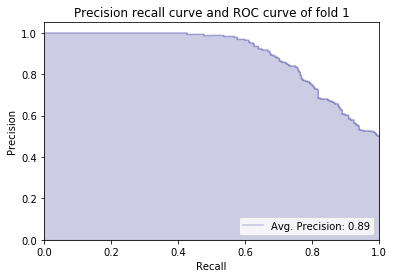

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /home/kyungha/Downloads/BBB_phage_display/models/model_fname_1/assets
Epoch 1/50
160/160 - 1s - loss: 0.6839 - acc: 0.5625 - val_loss: 0.6842 - val_acc: 0.5063
Epoch 2/50
160/160 - 1s - loss: 0.6558 - acc: 0.6484 - val_loss: 0.6477 - val_acc: 0.6797
Epoch 3/50
160/160 - 0s - loss: 0.6247 - acc: 0.6773 - val_loss: 0.6209 - val_acc: 0.7156
Epoch 4/50
160/160 - 0s - loss: 0.5920 - acc: 0.7121 - val_loss: 0.5904 - val_acc: 0.7437
Epoch 5/50
160/160 - 1s - loss: 0.5678 - acc: 0.7254 - val_loss: 0.5697 - val_acc: 0.7437
Epoch 6/50
160/160 - 0s - loss: 0.5460 - acc: 0.7277 - val_loss: 0.5664 - val_acc: 0.7500
Epoch 7/50
160/160 - 1s - loss: 0.5236 - acc: 0.7605 - val_loss: 0.5435 - val_acc: 0.7219
Epoch 8/50
160/160 - 1s - loss:

<Figure size 432x288 with 0 Axes>

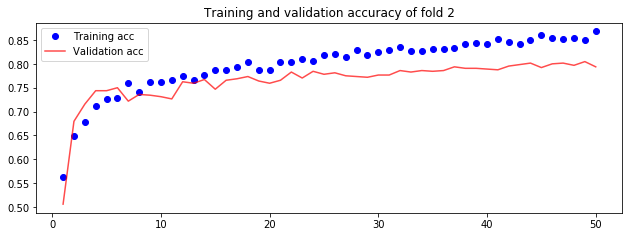

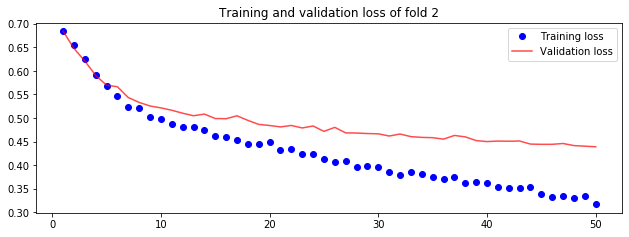

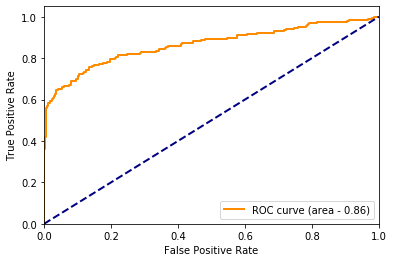

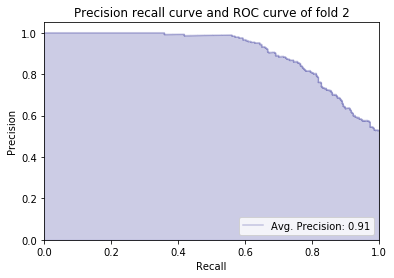

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/BBB_phage_display/models/model_fname_2/assets
Epoch 1/50
160/160 - 1s - loss: 0.6817 - acc: 0.5613 - val_loss: 0.6674 - val_acc: 0.6297
Epoch 2/50
160/160 - 0s - loss: 0.6420 - acc: 0.6605 - val_loss: 0.6383 - val_acc: 0.6328
Epoch 3/50
160/160 - 0s - loss: 0.6017 - acc: 0.6879 - val_loss: 0.6163 - val_acc: 0.6812
Epoch 4/50
160/160 - 0s - loss: 0.5711 - acc: 0.7176 - val_loss: 0.5899 - val_acc: 0.7063
Epoch 5/50
160/160 - 1s - loss: 0.5471 - acc: 0.7223 - val_loss: 0.5822 - val_acc: 0.7219
Epoch 6/50
160/160 - 1s - loss: 0.5353 - acc: 0.7441 - val_loss: 0.5791 - val_acc: 0.6703
Epoch 7/50
160/160 - 0s - loss: 0.5170 - acc: 0.7500 - val_loss: 0.5643 - val_acc: 0.7359
Epoch 8/50
160/160 - 1s - loss: 0.5014 - acc: 0.7672 - val_loss: 0.5486 - val_acc: 0.7297
Epoch 9/50
160/160 - 1s - loss: 0.5028 - acc: 0.7527 - val_loss: 0.5459 - val_acc: 0.7484
Epoch 10/50
160/160 - 0s - loss: 0.4864 - acc: 0.7766 - val_loss: 0.5405 - val_acc: 0

<Figure size 432x288 with 0 Axes>

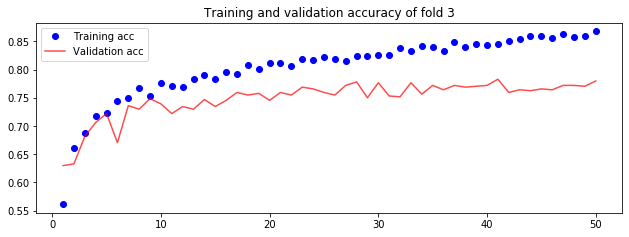

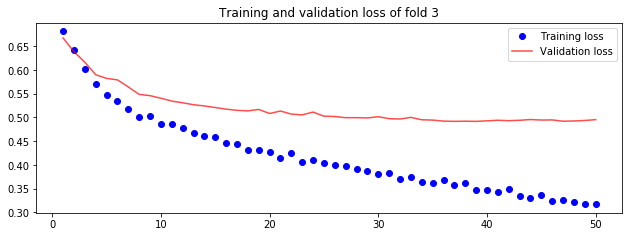

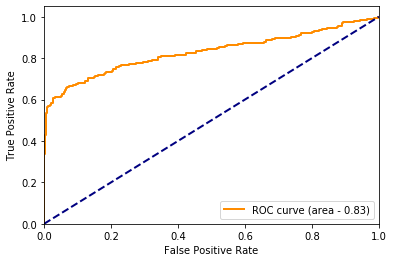

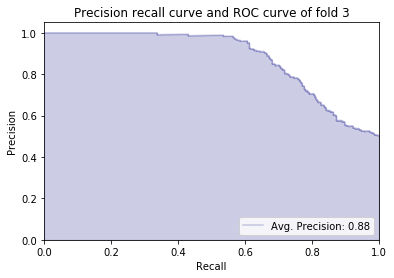

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/BBB_phage_display/models/model_fname_3/assets
Epoch 1/50
160/160 - 1s - loss: 0.6855 - acc: 0.5633 - val_loss: 0.6709 - val_acc: 0.6875
Epoch 2/50
160/160 - 1s - loss: 0.6499 - acc: 0.6602 - val_loss: 0.6461 - val_acc: 0.6516
Epoch 3/50
160/160 - 1s - loss: 0.6172 - acc: 0.6887 - val_loss: 0.6151 - val_acc: 0.7141
Epoch 4/50
160/160 - 1s - loss: 0.5791 - acc: 0.7219 - val_loss: 0.5928 - val_acc: 0.7234
Epoch 5/50
160/160 - 1s - loss: 0.5537 - acc: 0.7340 - val_loss: 0.5782 - val_acc: 0.7203
Epoch 6/50
160/160 - 1s - loss: 0.5371 - acc: 0.7332 - val_loss: 0.5658 - val_acc: 0.7234
Epoch 7/50
160/160 - 1s - loss: 0.5287 - acc: 0.7355 - val_loss: 0.5538 - val_acc: 0.7375
Epoch 8/50
160/160 - 1s - loss: 0.5143 - acc: 0.7504 - val_loss: 0.5484 - val_acc: 0.7531
Epoch 9/50
160/160 - 1s - loss: 0.5092 - acc: 0.7578 - val_loss: 0.5394 - val_acc: 0.7453
Epoch 10/50
160/160 - 1s - loss: 0.5011 - acc: 0.7641 - val_loss: 0.5346 - val_acc: 0

<Figure size 432x288 with 0 Axes>

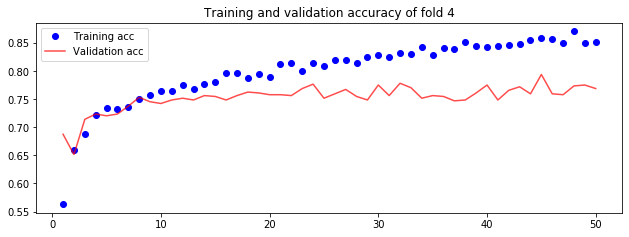

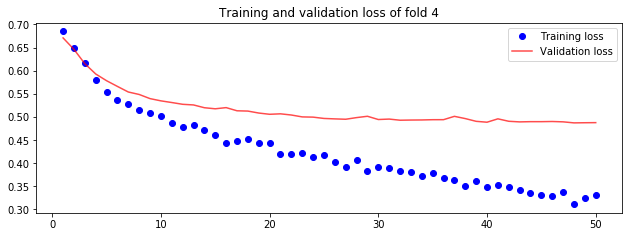

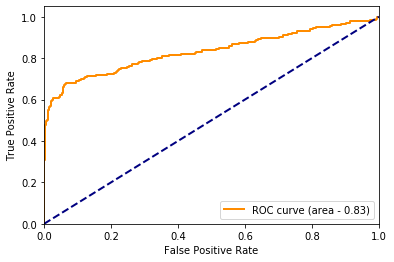

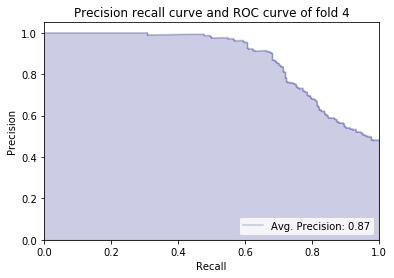

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/BBB_phage_display/models/model_fname_4/assets
Epoch 1/50
160/160 - 1s - loss: 0.6876 - acc: 0.5473 - val_loss: 0.6716 - val_acc: 0.6297
Epoch 2/50
160/160 - 0s - loss: 0.6548 - acc: 0.6520 - val_loss: 0.6358 - val_acc: 0.7188
Epoch 3/50
160/160 - 0s - loss: 0.6182 - acc: 0.6891 - val_loss: 0.6034 - val_acc: 0.7266
Epoch 4/50
160/160 - 0s - loss: 0.5842 - acc: 0.7148 - val_loss: 0.5774 - val_acc: 0.7406
Epoch 5/50
160/160 - 0s - loss: 0.5600 - acc: 0.7312 - val_loss: 0.5590 - val_acc: 0.7578
Epoch 6/50
160/160 - 0s - loss: 0.5435 - acc: 0.7309 - val_loss: 0.5551 - val_acc: 0.7203
Epoch 7/50
160/160 - 0s - loss: 0.5272 - acc: 0.7387 - val_loss: 0.5374 - val_acc: 0.7750
Epoch 8/50
160/160 - 0s - loss: 0.5159 - acc: 0.7477 - val_loss: 0.5319 - val_acc: 0.7625
Epoch 9/50
160/160 - 0s - loss: 0.5068 - acc: 0.7574 - val_loss: 0.5288 - val_acc: 0.7484
Epoch 10/50
160/160 - 0s - loss: 0.4945 - acc: 0.7609 - val_loss: 0.5292 - val_acc: 0

<Figure size 432x288 with 0 Axes>

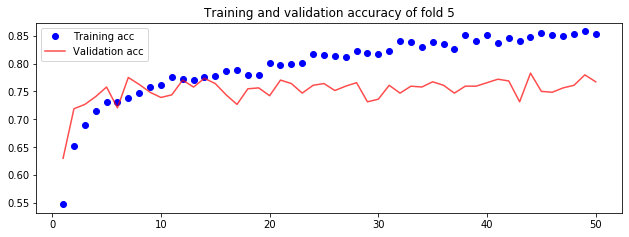

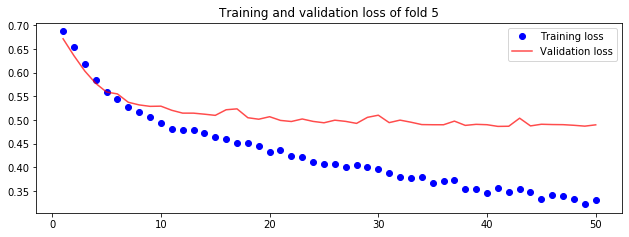

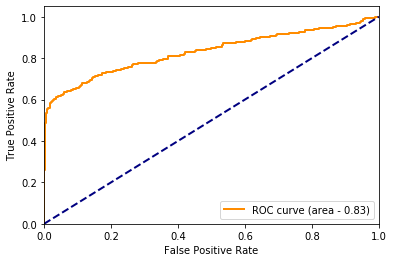

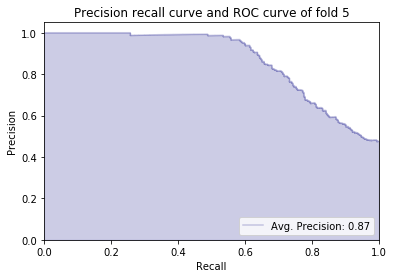

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/BBB_phage_display/models/model_fname_5/assets


<Figure size 432x288 with 0 Axes>

In [13]:
#Find optimal model from multiple data sets made by shuffle-split
import numpy as np
#균일하게 class가 분포된 data이므로 ShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from tensorflow.keras import optimizers
#최적의 model 적용을 위해 그래프들을 for문 내에 넣기
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve,average_precision_score, confusion_matrix, f1_score,matthews_corrcoef
from inspect import signature
split_data = ShuffleSplit(n_splits = 5, train_size = None, test_size = 0.2, random_state=1)
acc_per_fold = []
loss_per_fold = []
n_iter =0

for train_idx, test_idx in split_data.split(X_seq, Y_class):
    X_train = np.array(X_seq[train_idx])
    X_test = np.array(X_seq[test_idx])
    y_train = np.array(Y_class[train_idx])
    y_test = np.array(Y_class[test_idx])
    #Model 구조 정의
    model = models.Sequential()
    model.add(layers.Conv1D(filters = params[0][1],kernel_size = params[0][2],strides = params[0][3],activation=activation_func, input_shape=(PEP_length,AA_type),kernel_regularizer=regularizer_params, bias_regularizer=regularizer_params,padding='same'))
    model.add(layers.Dropout(rate = params[1][1])) #add noise
    model.add(layers.MaxPool1D(pool_size = params[2][1], strides = params[2][2]))
    model.add(layers.Flatten())
    model.add(layers.Dense(params[4][1], activation=activation_func, kernel_regularizer=regularizer_params,bias_regularizer=regularizer_params))
    model.add(layers.Dense(1, activation='sigmoid')) #'softmax' for N class
    #Model compile 수행
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.000075), metrics=['acc'] )
    dict_history[model_version] = model.fit(x=X_train,y=y_train,shuffle=True, steps_per_epoch=steps_per_epoch, epochs=Epochs, batch_size = BATCH_SIZE, validation_data=(X_test, y_test), verbose=2)
    #steps_per_epoch=steps_per_epoch
    history = dict_history[model_version]
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f'Score for fold {n_iter+1}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%\n')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    epochs = range(1, len(acc) + 1)
    fig = plt.figure(figsize=(10.5,3.5))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', alpha=0.7, label='Validation acc')
    plt.title(f'Training and validation accuracy of fold {n_iter+1}')
    plt.legend()
    fig = plt.figure(figsize=(10.5,3.5))
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', alpha=0.7, label='Validation loss')
    plt.title(f'Training and validation loss of fold {n_iter+1}')
    plt.legend()
    plt.show()
    
    pred = model.predict(x=X_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area - %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
    plt.cla()
    plt.clf()
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    average_precision = average_precision_score(y_test, pred)
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='navy', alpha=0.2, where='post', label='Avg. Precision: {0:0.2f}'.format(average_precision))
    plt.fill_between(recall, precision, alpha=0.2, color='navy', **step_kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')
    plt.title(f'Precision recall curve and ROC curve of fold {n_iter+1}')
    plt.show()
    plt.cla()
    plt.clf()
    globals()['model_fname_{}'.format(n_iter+1)] = f'BBBphagedisplay_TEST_{n_iter+1}_{model_version:03}.h5'
    model_spath = os.path.join(model_path,f'model_fname_{n_iter+1}')
    model.save(model_spath)
    n_iter += 1

In [14]:
m_test.to_csv('/path_for_saving_test_data_set/Invivo_800_for_test.csv', sep='\t')

In [15]:
m_test_df = pd.read_csv('/path_to_test_data_set/Invivo_800_for_test.csv', sep = "\t")

In [16]:
m_test_df.drop('Unnamed: 0', inplace = True, axis = 1)

In [17]:
#Test from 800 sequences (4,000 - 3,200)
#Random selection

test_invivo = m_test_df['#pseq'].tolist()
X_test_m = [one_hot_encoder(x) for x in test_invivo]
X_test_m = np.transpose(np.asarray(X_test_m), (0, 2, 1))

In [41]:
model_fit = keras.models.load_model("/path_to_models/models/model_fname_num/")

In [42]:
p_test_invivo = model_fit.predict(X_test_m)
p_test_invivo_flat = p_test_invivo.flatten()
p_test_invivo_score = p_test_invivo_flat.tolist()

In [43]:
p_test_invivo_class = []
for i in p_test_invivo_score:
    if i >= 0.5:
        j = 1
    elif i < 0.5:
        j = 0
    p_test_invivo_class.append(j)
print(p_test_invivo_class[:10])

[0, 1, 0, 0, 1, 1, 1, 0, 1, 1]


In [44]:
df_invivo = pd.DataFrame(list(zip(p_test_invivo_score, p_test_invivo_class)), columns = ['Score', 'Class'])

In [45]:
p_test_invivo = pd.concat([m_test_df, df_invivo], axis = 1)

In [46]:
p_test_invivo.to_csv('/path_for_saving_predicted_results_of_test_set/Invivo_800_for_test_predicted.csv', sep='\t')

In [47]:
p_test_invivo.columns = ['#pseq', 'Class_ans', 'Input2_1', 'Input2_2', 'Input2_3', 'Invivo_1', 'Invivo_2', 'Invivo_3', 'Pred_score', 'Pred_class']
p_test_invivo.head()

,#pseq,Class_ans,Input2_1,Input2_2,Input2_3,Invivo_1,Invivo_2,Invivo_3,Pred_score,Pred_class
0,IIYAEGPMMHAG,1,0.00,0.00,0.00,11.13,13.65,11.16,0.164723,0
1,DETNESVLQMSE,0,5.20,4.10,13.66,0.00,0.00,0.00,0.619134,1
2,ADSSRGRLHDSG,0,0.98,2.05,3.72,0.00,0.00,0.00,0.124948,0
3,ASTKYGSTLIKW,1,0.00,0.00,0.00,0.00,0.00,1.08,0.386768,0
4,LNVTKSVYPGIR,1,0.33,0.00,0.00,0.00,0.43,1.08,0.931990,1


In [48]:
ans_c = p_test_invivo['Class_ans'].tolist()
pred_c = p_test_invivo['Pred_class'].tolist()
n = 0
for i in range(len(pred_c)):
    if pred_c[i] == ans_c[i]:
        n += 1
print(n)
print((n/len(pred_c)*100))

625
78.125
